## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("../input/clean_train.csv")
train["Category"] = pd.read_csv("../input/train_values/name.csv")
test = pd.read_csv("../input/test.csv")
test["Category"] = pd.read_csv("../input/test_values/name.csv")
all_data = [train, test]
train.shape, test.shape

((881, 13), (418, 11))

## Null values by Age

In [4]:
print("NULL VALUES IN TRAIN SET: ", train["Age"].isnull().sum())
print("NULL VALUES IN TEST SET: ", test["Age"].isnull().sum())

NULL VALUES IN TRAIN SET:  170
NULL VALUES IN TEST SET:  86


## Plot survivors by Age

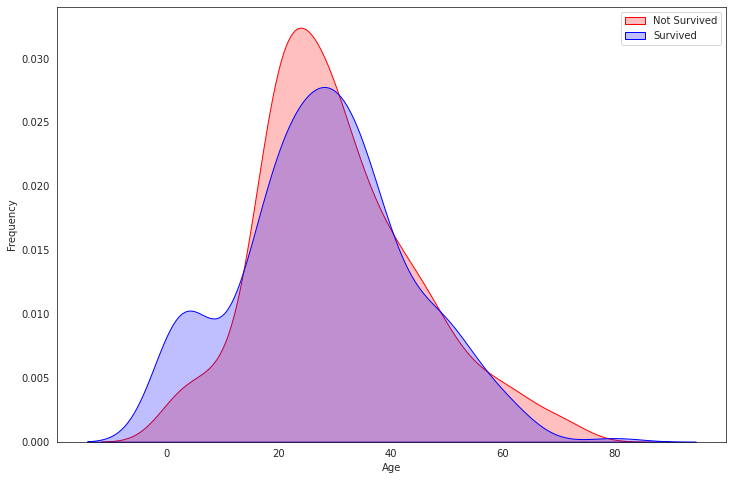

In [5]:
age = train["Age"]
survived = train["Survived"]
with sns.axes_style("white"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.kdeplot(age[survived == 0 & age.notnull()], color="Red", shade = True)
    g = sns.kdeplot(age[survived == 1 & age.notnull()], ax =g, color="Blue", shade= True)
    g.set_xlabel("Age")
    g.set_ylabel("Frequency")
    g = g.legend(["Not Survived","Survived"])

## Age in relationship to other features

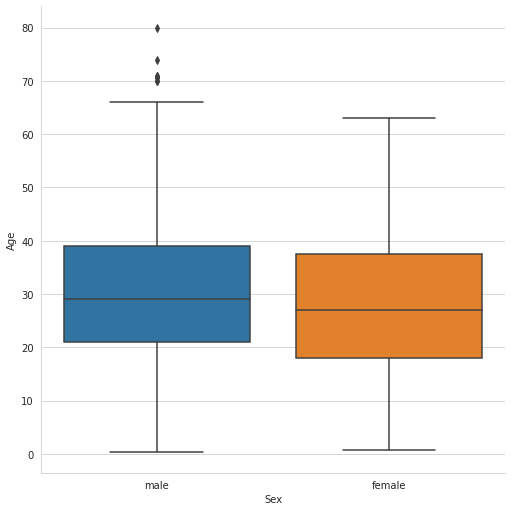

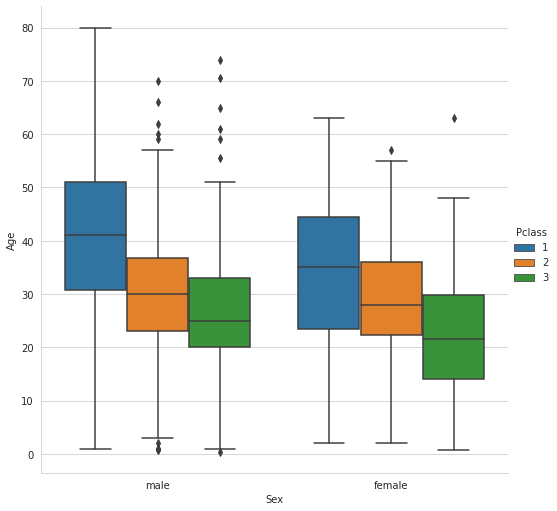

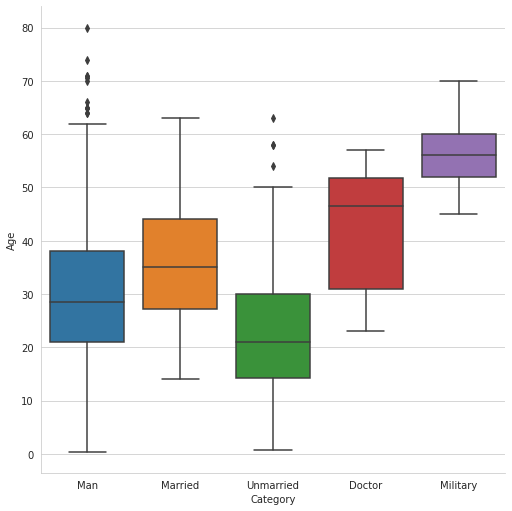

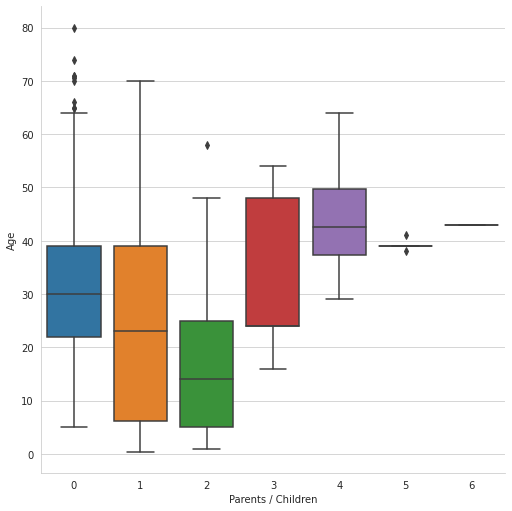

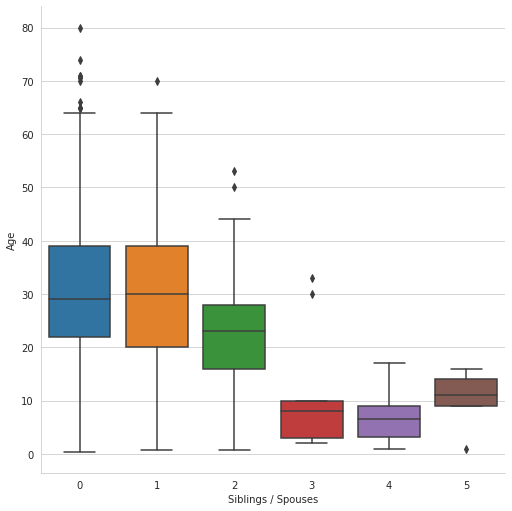

In [6]:
with sns.axes_style("whitegrid"):
    g = sns.catplot(data=train, kind="box", x="Sex", y="Age", height=7)
    g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=train, kind="box", height=7)
    g = sns.catplot(y="Age",x="Category", data=train, kind="box", height=7)
    g = sns.catplot(y="Age",x="Parch", data=train, kind="box", height=7)
    g.set_xlabels("Parents / Children")
    g = sns.catplot(y="Age",x="SibSp", data=train, kind="box", height=7)
    g.set_xlabels("Siblings / Spouses")

Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age.
However, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.
Moreover, the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is.

In [7]:
train["Sex"] = train["Sex"].map({"male": 0, "female":1})

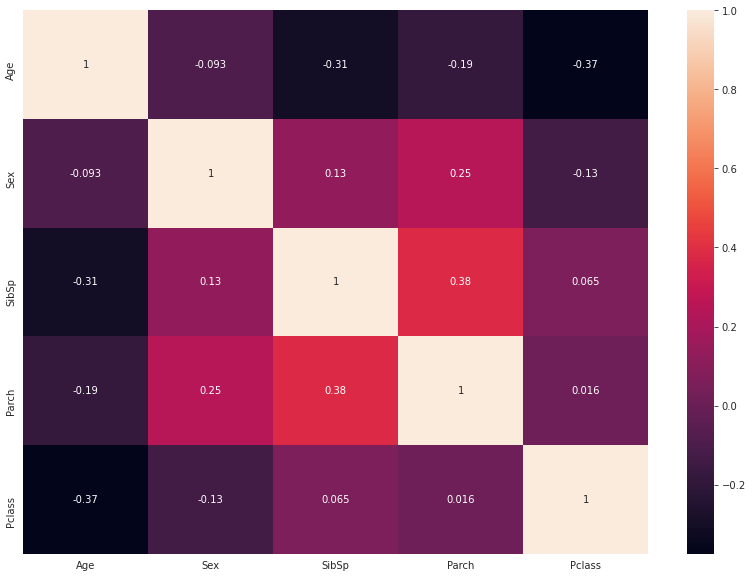

In [8]:
corr = train[["Age","Sex","SibSp","Parch","Pclass"]].corr()
with sns.axes_style("whitegrid"):
    g = plt.subplots(figsize=(14, 10))
    g = sns.heatmap(corr, annot=True)

## Create an Age dataset

In [9]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Married
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unmarried
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Married
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Man
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,Man
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,Man
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,Man
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,Married
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,Married


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
Category         0
dtype: int64

In [11]:
age_known = train.dropna(subset=["Age"])
age_known.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
Category         0
dtype: int64

In [12]:
age_dataframe = pd.DataFrame()
age_dataframe["Category"] = age_known["Category"]
age_dataframe["Pclass"] = age_known["Pclass"]
age_dataframe["Parch"] = age_known["Parch"]
age_dataframe["SibSp"] = age_known["SibSp"]
age_dataframe["Age"] = age_known["Age"]

In [13]:
age_dataframe.head(10)

,Category,Pclass,Parch,SibSp,Age
0,Man,3,0,1,22.0
1,Married,1,0,1,38.0
2,Unmarried,3,0,0,26.0
3,Married,1,0,1,35.0
4,Man,3,0,0,35.0
6,Man,1,0,0,54.0
7,Man,3,1,3,2.0
8,Married,3,2,0,27.0
9,Married,2,0,1,14.0
10,Unmarried,3,1,1,4.0


In [ ]:
age_known_test = test.dropna(subset=["Age"])
age_dataframe_test = pd.DataFrame()
age_dataframe_test["Category"] = age_known_test["Category"]
age_dataframe_test["Pclass"] = age_known_test["Pclass"]
age_dataframe_test["Parch"] = age_known_test["Parch"]
age_dataframe_test["SibSp"] = age_known_test["SibSp"]
age_dataframe_test["Age"] = age_known_test["Age"]

## Train a model to predict the null ages

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

In [15]:
from sklearn.linear_model import LinearRegression as Linear
from sklearn.linear_model import BayesianRidge as Bayesian
from sklearn.linear_model import RANSACRegressor as RANSAC
from sklearn.tree import DecisionTreeRegressor as DecisionTree
from sklearn.ensemble import RandomForestRegressor as RandomForest
from sklearn.svm import SVR as SVR
from sklearn.neighbors import KNeighborsRegressor as KNeighbors

In [16]:
encoder = preprocessing.LabelEncoder()
x_train = age_dataframe.drop(["Age"], axis=1)
x_train["Category"] = encoder.fit_transform(x_train["Category"])
y_train = age_dataframe["Age"]
models = ["Linear", "Bayesian", "RANSAC", "DecisionTree", "RandomForest", "SVR", "KNeighbors"]
encoder.classes_

array(['Doctor', 'Man', 'Married', 'Military', 'Unmarried'], dtype=object)

In [17]:
def testModel(model, data, target, parameters=""):
    model = eval(model)()
    if parameters:
        string = "model.set_params("+parameters+")"
        exec(string)
    mean_folds = np.abs(cross_val_score(model, data, target, cv=5, scoring="neg_mean_squared_error"))
    mean_score= np.mean(mean_folds)
    r2_folds = np.abs(cross_val_score(model, data, target, cv=5, scoring="r2"))
    r2_score = np.mean(r2_folds)
    print("Mean folds: ", mean_folds)
    print("Mean squared error: ", format(mean_score, ".4e"))
    print("R2 folds: ", r2_folds)
    print("R2 score: ", "{0:.5g}".format(r2_score*100), "%")

def testModels(models, data, target):
    for i in models:
        print("Model: "+i)
        testModel(i, data, target)
        print("")

In [18]:
testModels(models, x_train, y_train)

Model: Linear
Mean folds:  [150.83275474 149.58447189 148.6951789  160.31247946 174.62598458]
Mean squared error:  1.5681e+02
R2 folds:  [0.33665575 0.21106676 0.28535674 0.25420553 0.13710959]
R2 score:  24.488 %

Model: Bayesian
Mean folds:  [150.87772142 149.33758291 148.67928755 160.69689212 174.45554558]
Mean squared error:  1.5681e+02
R2 folds:  [0.33645799 0.21236889 0.28543312 0.25241719 0.13795179]
R2 score:  24.493 %

Model: RANSAC
Mean folds:  [284.96579651 171.79921805 166.14158257 372.86280782 208.25387018]
Mean squared error:  2.4080e+02
R2 folds:  [0.23007324 0.16981167 0.19465703 0.3735535  0.12463148]
R2 score:  21.855 %

Model: DecisionTree
Mean folds:  [150.68631764 125.31723835 176.12651821 165.59830779 178.32888196]
Mean squared error:  1.5921e+02
R2 folds:  [0.33869109 0.33905616 0.1535191  0.22961517 0.11881223]
R2 score:  23.594 %

Model: RandomForest
Mean folds:  [134.98875656 123.81741995 155.60696604 161.39009375 165.7519292 ]
Mean squared error:  1.4831e+02


Ransac is the best Model!

## Train the RANSAC model to get the Age values

In [19]:
null_values = train["Age"].isnull()
unknown_list = train[null_values].index.tolist()
age_unknown = train.iloc[unknown_list]
age_unknown.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          151
Embarked         0
Category         0
dtype: int64

In [20]:
age_unknown.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,Man
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S,Man
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C,Married
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C,Man
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q,Unmarried
28,30,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,NaN,S,Man
30,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,C,Married
31,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,NaN,Q,Unmarried
35,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,NaN,C,Man
41,43,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,NaN,C,Man


In [21]:
x_test = pd.DataFrame()
x_test["Category"] = age_unknown["Category"]
x_test["Pclass"] = age_unknown["Pclass"]
x_test["Parch"] = age_unknown["Parch"]
x_test["SibSp"] = age_unknown["SibSp"]
x_test.head(10)

,Category,Pclass,Parch,SibSp
5,Man,3,0,0
17,Man,2,0,0
19,Married,3,0,0
26,Man,3,0,0
27,Unmarried,3,0,0
28,Man,3,0,0
30,Married,1,0,1
31,Unmarried,3,0,0
35,Man,3,0,0
41,Man,3,0,0


In [22]:
x_test["Category"] = encoder.transform(x_test["Category"])

In [23]:
model = RANSAC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Number of predictions: ", predictions.size)

Number of predictions:  170


In [24]:
print("Original age # of null values: ", train["Age"].isnull().sum())

Original age # of null values:  170


## Do the same for the test dataset

In [42]:
encoder = preprocessing.LabelEncoder()
w_train = age_dataframe_test.drop(["Age"], axis=1)
w_train["Category"] = encoder.fit_transform(w_train["Category"])
z_train = age_dataframe_test["Age"]
encoder.classes_

array(['Doctor', 'Man', 'Married', 'Military', 'Unmarried'], dtype=object)

In [45]:
null_values_test = test["Age"].isnull()
unknown_list_test = test[null_values_test].index.tolist()
age_unknown_test = test.iloc[unknown_list_test]

w_test = pd.DataFrame()
w_test["Category"] = age_unknown_test["Category"]
w_test["Pclass"] = age_unknown_test["Pclass"]
w_test["Parch"] = age_unknown_test["Parch"]
w_test["SibSp"] = age_unknown_test["SibSp"]
w_test["Category"] = encoder.transform(w_test["Category"])
w_test.head()

,Category,Pclass,Parch,SibSp
10,1,3,0,0
22,2,1,0,0
29,1,3,0,2
33,2,3,2,1
36,4,3,0,0


In [46]:
test_predictions = model.predict(w_test)

## Fill the null values

In [25]:
train[train["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,Man
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S,Man
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C,Married
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C,Man
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q,Unmarried


In [47]:
indexes = train[train['Age'].isnull()].index
test_indexes = test[test['Age'].isnull()].index
values = pd.Series(predictions, index=indexes)
test_values = pd.Series(test_predictions, index = test_indexes)
values.head(10)

5     25.760698
17    32.549277
19    23.091750
26    25.760698
27    17.753853
28    25.760698
30    38.603582
31    17.753853
35    25.760698
41    25.760698
dtype: float64

In [48]:
train["Filled"] = train["Age"]
test["Filled"] = test["Age"]
train["Filled"].fillna(values, inplace=True)
test["Filled"].fillna(test_values, inplace=True)

In [28]:
train["Filled"].isnull().sum()

0

In [49]:
test["Filled"].isnull().sum()

0

## Export the age values

In [29]:
train["Filled"].to_csv("../input/train_values/age.csv", header=["Age"], index=False)

In [50]:
test["Filled"].to_csv("../input/test_values/age.csv", header=["Age"], index=False)